In [ ]:
!pip install gdown

ERROR: Operation cancelled by user


In [ ]:
file_id = '1vFpaOc_Clgn_k8Rldw528aRyBcNP47oQ'
output_name = 'US_Accidents_March23.csv'

# gdown to download the file
!gdown --id {file_id} -O {output_name}

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vFpaOc_Clgn_k8Rldw528aRyBcNP47oQ
From (redirected): https://drive.google.com/uc?id=1vFpaOc_Clgn_k8Rldw528aRyBcNP47oQ&confirm=t&uuid=ce251851-d6bf-448c-83c5-fc1ec23eae9d
To: /content/US_Accidents_March23.csv
100% 3.06G/3.06G [01:03<00:00, 48.2MB/s]


In [ ]:
import pandas as pd
import polars as pl

In [ ]:
df = pl.read_csv('US_Accidents_March23.csv')

Pre Processing

In [ ]:
#The 10 columns that are almost entirely false and thus not useful
df_drop = df.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'])

In [ ]:
#Just a couple of extra columns that do not give us enough information on their own to warrant staying.
#Closely associated with Sunset, so they will not add to our analysis
df_drop = df_drop.drop(['Nautical_Twilight','Astronomical_Twilight', 'Civil_Twilight'])

In [ ]:
df_drop = df_drop.drop(['End_Lat','End_Lng']) #since majority of the values are null and these columns are insignificant

In [ ]:
bool_cols = ['Junction', 'Crossing', 'Traffic_Signal']
df_drop = df_drop.with_columns([pl.col(col).cast(pl.Int32).alias(col) for col in bool_cols])

In [ ]:
df_drop = df_drop.drop(['Country']) #This is a uniform column displaying just the 'US'

In [ ]:
df_drop = df_drop.drop(['Airport_Code','ID']) #not useful in our context

In [ ]:
df_drop = df_drop.drop(['Weather_Timestamp']) #This relates to what time the weather data was recorded, so irrelevant to us

In [ ]:
# List of columns to fill null values with mean
cols_to_fill = ['Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)']

# Fill null values with the mean of the column
df_drop = df_drop.with_columns([pl.col(col).fill_null(pl.col(col).mean()).alias(col) for col in cols_to_fill])
df_drop.head(10)

Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
str,i64,str,str,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str
"""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""Calm""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""Calm""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night"""
"""Source2""",3,"""2016-02-08 07:23:34""","""2016-02-08 07:53:34""",39.747753,-84.205582,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US/Eastern""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,0.008407,"""Mostly Cloudy""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 07:39:07""","""2016-02-08 08:09:07""",39.627781,-84.188354,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US/Eastern""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,0.008407,"""Mostly Cloudy""",0,0,1,"""Day"""
"""Source2""",3,"""2016-02-08 07:44:26""","""2016-02-08 08:14:26""",40.10059,-82.925194,0.01,"""Accident on I-270 Outerbelt No…","""Westerville Rd""","""Westerville""","""Franklin""","""OH""","""43081""","""US/Eastern""",37.9,35.5,97.0,29.63,7.0,"""SSW""",3.5,0.03,"""Light Rain""",0,0,0,"""Day"""
"""Source2""",2,"""2016-02-08 07:59:35""","""2016-02-08 08:29:35""",39.758274,-84.230507,0.0,"""Accident on Oakridge Dr at Woo…","""N Woodward Ave""","""Dayton""","""Montgomery""","""OH""","""45417-2476""","""US/Eastern""",34.0,31.0,100.0,29.66,7.0,"""WSW""",3.5,0.008407,"""Overcast""",0,0,0,"""Day"""
"""Source2""",3,"""2016-02-08 07:59:58""","""2016-02-08 08:29:58""",39.770382,-84.194901,0.01,"""Accident on I-75 Southbound at…","""N Main St""","""Dayton""","""Montgomery""","""OH""","""45405""","""US/Eastern""",34.0,31.0,100.0,29.66,7.0,"""WSW""",3.5,0.008407,"""Overcast""",0,0,0,"""Day"""
"""Source2""",2,"""2016-02-08 08:00:40""","""2016-02-08 08:30:40""",39.778061,-84.172005,0.0,"""Accident on Notre Dame Ave at …","""Notre Dame Ave""","""Dayton""","""Montgomery""","""OH""","""45404-1923""","""US/Eastern""",33.3,58.251048,99.0,29.67,5.0,"""SW""",1.2,0.008407,"""Mostly Cloudy""",0,0,0,"""Day"""


In [ ]:
# Step 1: Clean the datetime strings to remove fractional seconds
df_drop = df_drop.with_columns([
    pl.col('Start_Time').str.replace(r'\.\d+', '').alias('Start_Time'),  # Remove anything after the seconds
    pl.col('End_Time').str.replace(r'\.\d+', '').alias('End_Time')      # Remove anything after the seconds
])

# Step 2: Identify invalid datetime entries (optional but useful for debugging)
invalid_start = df_drop.filter(~pl.col('Start_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=True).is_not_null())
invalid_end = df_drop.filter(~pl.col('End_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=True).is_not_null())

print("Invalid Start_Time entries:")
print(invalid_start)

print("Invalid End_Time entries:")
print(invalid_end)

# Step 3: Convert the cleaned time data into workable DateTime objects with strict=False
df_drop = df_drop.with_columns([
    pl.col('Start_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=False).alias('Start_Time'),
    pl.col('End_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=False).alias('End_Time')
])

# Breaking the start time into usable independent features
df_drop = df_drop.with_columns([
    pl.col('Start_Time').dt.year().alias('Year'),
    pl.col('Start_Time').dt.month().alias('Month'),
    pl.col('Start_Time').dt.day().alias('Day'),
    pl.col('Start_Time').dt.hour().alias('Time_S'),
    pl.col('Start_Time').dt.weekday().alias('Weekday'),
    (pl.col('End_Time') - pl.col('Start_Time')).dt.total_seconds().alias('Duration')
])

# Drop the original Start_Time and End_Time columns
df_drop = df_drop.drop(['Start_Time', 'End_Time'])

Invalid Start_Time entries:
shape: (0, 27)
┌────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬──────────────┬─────────────┐
│ Source ┆ Severity ┆ Start_Time ┆ End_Time ┆ … ┆ Crossing ┆ Junction ┆ Traffic_Sign ┆ Sunrise_Sun │
│ ---    ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ al           ┆ set         │
│ str    ┆ i64      ┆ str        ┆ str      ┆   ┆ i32      ┆ i32      ┆ ---          ┆ ---         │
│        ┆          ┆            ┆          ┆   ┆          ┆          ┆ i32          ┆ str         │
╞════════╪══════════╪════════════╪══════════╪═══╪══════════╪══════════╪══════════════╪═════════════╡
└────────┴──────────┴────────────┴──────────┴───┴──────────┴──────────┴──────────────┴─────────────┘
Invalid End_Time entries:
shape: (0, 27)
┌────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬──────────────┬─────────────┐
│ Source ┆ Severity ┆ Start_Time ┆ End_Time ┆ … ┆ Crossing ┆ Junction ┆ Traffic_Sign ┆ Sunrise_Sun │
│ ---  

In [ ]:
# Filtering out rows where 'Weather_Condition' or 'Wind_Direction' are null
df_drop = df_drop.filter(~pl.col('Weather_Condition').is_null() | ~pl.col('Wind_Direction').is_null())

In [ ]:
#as we can see S means the same as South and N means the same as North and so on, hence cleaning this up
df_drop = df_drop.with_columns(
    pl.when(pl.col('Wind_Direction') == 'Calm').then(pl.lit('CALM'))
    .when(pl.col('Wind_Direction') == 'North').then(pl.lit('N'))
    .when(pl.col('Wind_Direction') == 'South').then(pl.lit('S'))
    .when(pl.col('Wind_Direction') == 'East').then(pl.lit('E'))
    .when(pl.col('Wind_Direction') == 'West').then(pl.lit('W'))
    .when(pl.col('Wind_Direction') == 'Variable').then(pl.lit('VAR'))
    .otherwise(pl.col('Wind_Direction'))  # Retain original value if no match
    .alias('Wind_Direction')  # Rename back to 'Wind_Direction'
)

In [ ]:
# Binning Time of Day
df_drop = df_drop.with_columns(
    pl.when(pl.col('Time_S').lt(6)).then(pl.lit('Early Morning'))
    .when(pl.col('Time_S').lt(12)).then(pl.lit('Morning'))
    .when(pl.col('Time_S').lt(18)).then(pl.lit('Afternoon'))
    .when(pl.col('Time_S').lt(24)).then(pl.lit('Evening'))
    .otherwise(pl.lit('Unknown')).alias('TimeofDay')
)

In [ ]:
# Binning Seasons
df_drop = df_drop.with_columns(
    pl.when(pl.col('Month').is_in([12, 1, 2])).then(pl.lit('Winter'))
    .when(pl.col('Month').is_in([3, 4, 5])).then(pl.lit('Spring'))
    .when(pl.col('Month').is_in([6, 7, 8])).then(pl.lit('Summer'))
    .when(pl.col('Month').is_in([9, 10, 11])).then(pl.lit('Autumn'))
    .otherwise(pl.lit('Unknown')).alias('Season')
)

In [ ]:
# Binning Day Type
df_drop = df_drop.with_columns(
    pl.when(pl.col('Weekday').is_in([1, 2, 3, 4])).then(pl.lit('Weekday'))
    .when(pl.col('Weekday').is_in([5, 6, 7])).then(pl.lit('Weekend'))
    .otherwise(pl.lit('Unknown')).alias('Day_Type')
)

In [ ]:
df_drop = df_drop.with_columns(
    pl.when(pl.col('Sunrise_Sunset') == 'Night').then(0)
    .when(pl.col('Sunrise_Sunset') == 'Day').then(1)
    .otherwise(pl.col('Sunrise_Sunset'))  # Retain original value if no match
    .alias('Sunrise_Sunset')  # Rename back to 'Wind_Direction'
)

In [ ]:
#We further clean wind direction by grouping similar values into one
df_drop = df_drop.with_columns(
    pl.when(pl.col('Wind_Direction') == 'Calm').then(pl.lit('CALM'))
    .when(pl.col('Wind_Direction').is_in(['West', 'WSW', 'WNW'])).then(pl.lit('W'))
    .when(pl.col('Wind_Direction').is_in(['South', 'SSW', 'SSE'])).then(pl.lit('S'))
    .when(pl.col('Wind_Direction').is_in(['North', 'NNW', 'NNE'])).then(pl.lit('N'))
    .when(pl.col('Wind_Direction').is_in(['East', 'ESE', 'ENE'])).then(pl.lit('E'))
    .when(pl.col('Wind_Direction') == 'Variable').then(pl.lit('VAR'))
    .otherwise(pl.col('Wind_Direction'))  # Retain original value if no match
    .alias('Wind_Direction')  # Rename back to 'Wind_Direction'
)

In [ ]:
# Create weather categories
df_drop = df_drop.with_columns([
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("clear|fair")).then(1).otherwise(0).alias("Clear"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("cloud|overcast")).then(1).otherwise(0).alias("Cloud"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("rain|storm|drizzle|shower|precipitation|light hail|small hail")).then(1).otherwise(0).alias("Rain"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("heavy rain|rain shower|heavy t-storm|heavy thunderstorms|thunder|hail")).then(1).otherwise(0).alias("Heavy_Rain"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("snow|sleet|ice|wintry mix")).then(1).otherwise(0).alias("Snow"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("heavy snow|heavy sleet|heavy ice pellets|snow showers|squalls")).then(1).otherwise(0).alias("Heavy_Snow"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("fog|haze|mist")).then(1).otherwise(0).alias("Fog"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("dust|smoke|sand|tornado")).then(1).otherwise(0).alias("Dusty"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("wind|winds")).then(1).otherwise(0).alias("Windy"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("ash")).then(1).otherwise(0).alias("Ash")
])

# Handle NA for the created weather features where 'Weather_Condition' is null
df_drop = df_drop.with_columns([
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Clear")).alias("Clear"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Cloud")).alias("Cloud"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Rain")).alias("Rain"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Heavy_Rain")).alias("Heavy_Rain"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Snow")).alias("Snow"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Heavy_Snow")).alias("Heavy_Snow"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Fog")).alias("Fog"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Dusty")).alias("Dusty"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Windy")).alias("Windy"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Ash")).alias("Ash")
])

# Drop 'Weather_Condition' column
df_drop = df_drop.drop("Weather_Condition")

# Convert the new weather columns to integers
weather_columns = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Dusty', 'Windy', 'Ash']
df_drop = df_drop.with_columns([pl.col(w).cast(pl.Int32) for w in weather_columns])

In [ ]:
df_drop = df_drop.drop(['Description', 'Street','Zipcode','Source','Year', 'Month', 'Day', 'Time_S', 'Weekday'])
#Description, Street and Zipcode are irrelevant features in severity analysis
#Source indicates from which source the data is captured, which is not useful again
#Year,Month,Day,Time_S and Weekday were used to create TimeofDay,Season,Day_Type through binning which are more useful features,hence these are removed

In [ ]:
used_features=['Severity', 'Distance(mi)','Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Direction',
               'Wind_Speed(mph)','Precipitation(in)','Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog', 'Dusty', 'Windy','Ash','Junction',
               'Crossing','Traffic_Signal','Sunrise_Sunset','TimeofDay', 'Season', 'Day_Type', 'Duration']
print(len(used_features))

28


In [ ]:
df_drop.head(5)

Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Duration,TimeofDay,Season,Day_Type,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Dusty,Windy,Ash
i64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,i32,i32,i32,str,i64,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
3,39.865147,-84.058723,0.01,"""Dayton""","""Montgomery""","""OH""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""CALM""",7.68549,0.02,0,0,0,"""0""",18840,"""Early Morning""","""Winter""","""Weekday""",0,0,1,0,0,0,0,0,0,0
2,39.928059,-82.831184,0.01,"""Reynoldsburg""","""Franklin""","""OH""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""CALM""",7.68549,0.0,0,0,0,"""0""",1800,"""Morning""","""Winter""","""Weekday""",0,0,1,0,0,0,0,0,0,0
2,39.063148,-84.032608,0.01,"""Williamsburg""","""Clermont""","""OH""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,0,0,1,"""0""",1800,"""Morning""","""Winter""","""Weekday""",0,1,0,0,0,0,0,0,0,0
3,39.747753,-84.205582,0.01,"""Dayton""","""Montgomery""","""OH""","""US/Eastern""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,0.008407,0,0,0,"""0""",1800,"""Morning""","""Winter""","""Weekday""",0,1,0,0,0,0,0,0,0,0
2,39.627781,-84.188354,0.01,"""Dayton""","""Montgomery""","""OH""","""US/Eastern""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,0.008407,0,0,1,"""1""",1800,"""Morning""","""Winter""","""Weekday""",0,1,0,0,0,0,0,0,0,0


EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_drop = df_drop.to_pandas()

Distribution of Severity

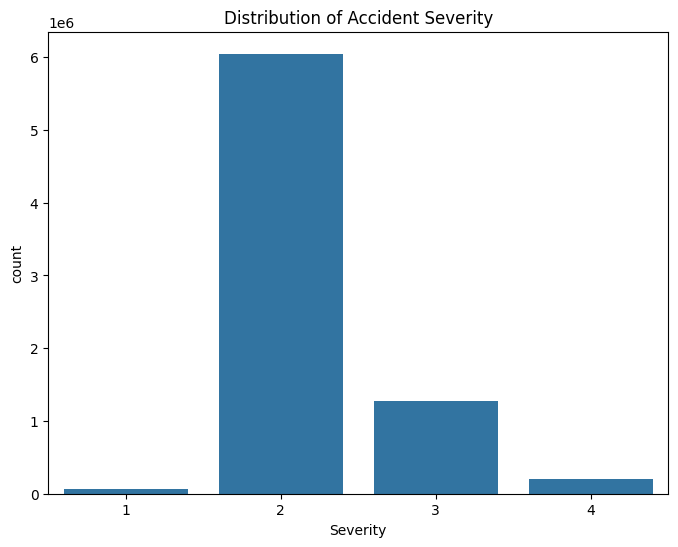

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Severity', data=df_drop)
plt.title("Distribution of Accident Severity")
plt.show()

Correlation Analysis for Numerical Features

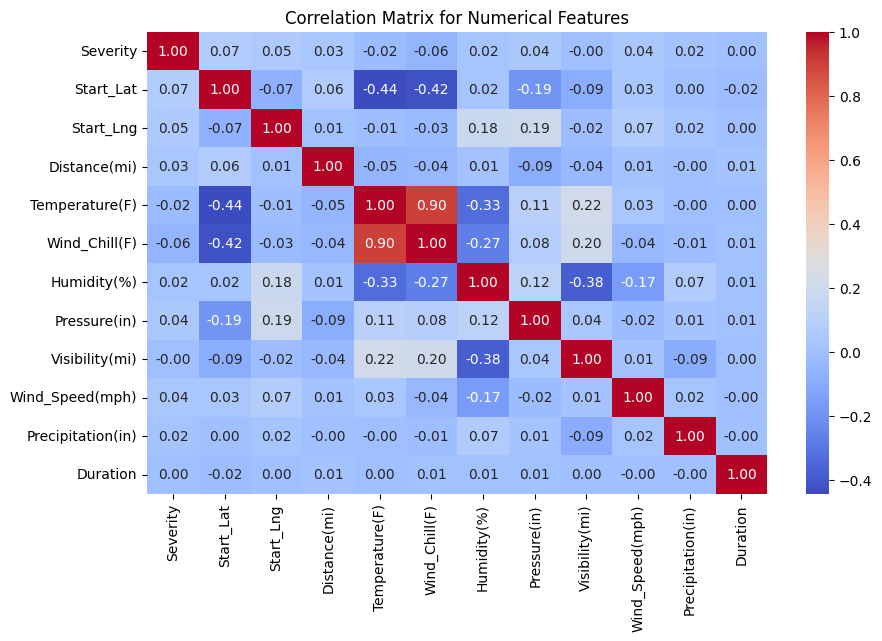

In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = df_drop[['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
                       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
                       'Precipitation(in)', 'Duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Distribution of Accidents by State

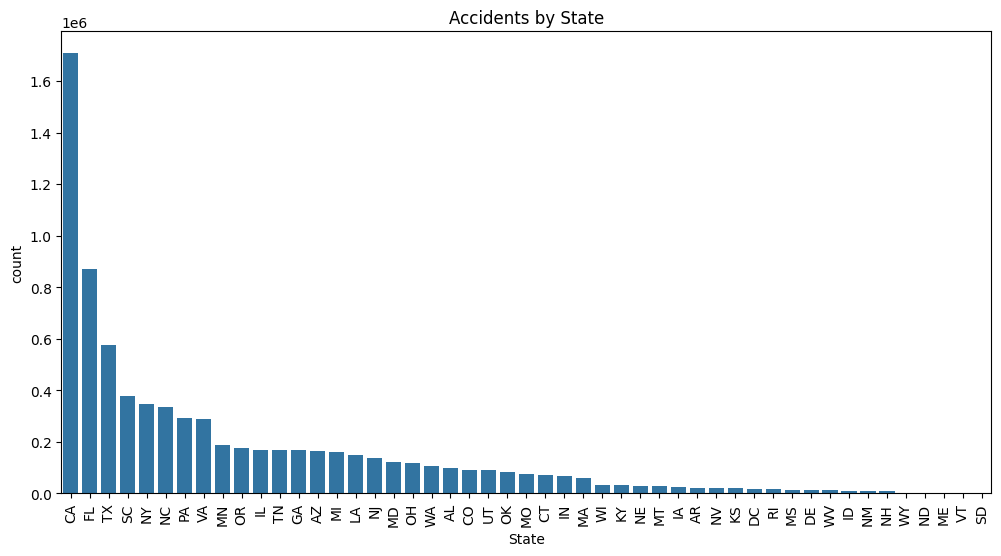

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='State', data=df_drop, order=df_drop['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Accidents by State")
plt.show()

Distribution of Accidents by City

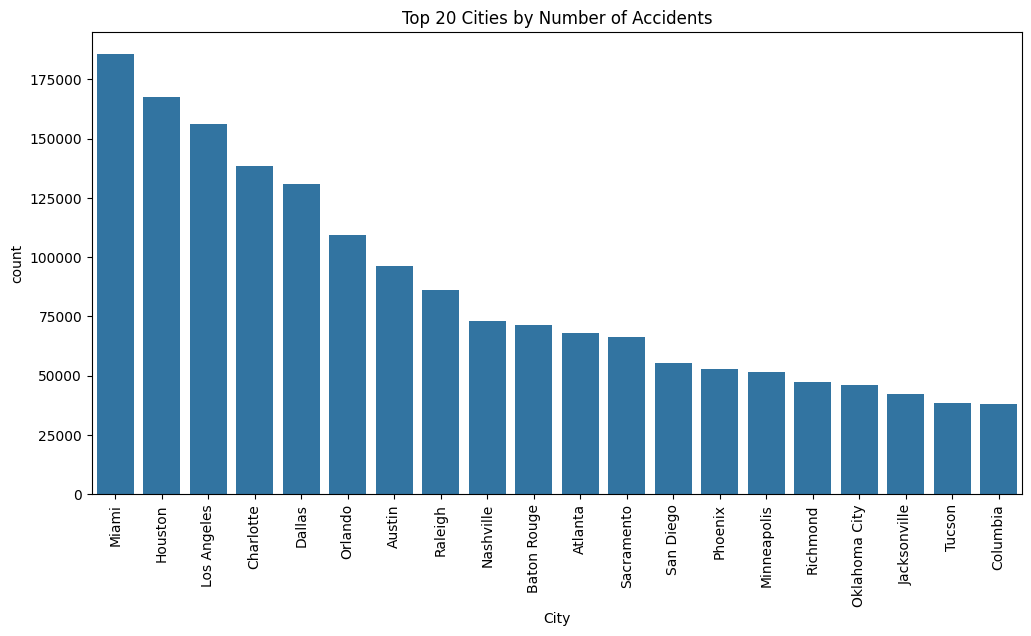

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='City', data=df_drop, order=df_drop['City'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title("Top 20 Cities by Number of Accidents")
plt.show()

Impact of Junctions on Severity

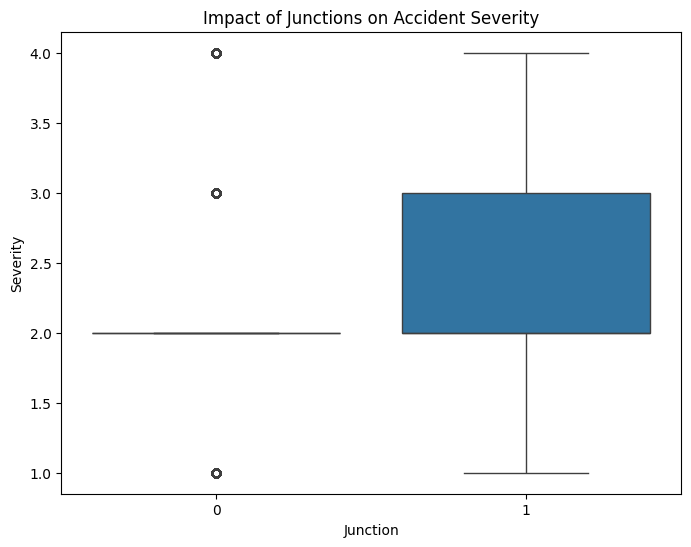

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Junction', y='Severity', data=df_drop)
plt.title('Impact of Junctions on Accident Severity')
plt.show()

Distribution of Duration of Accidents

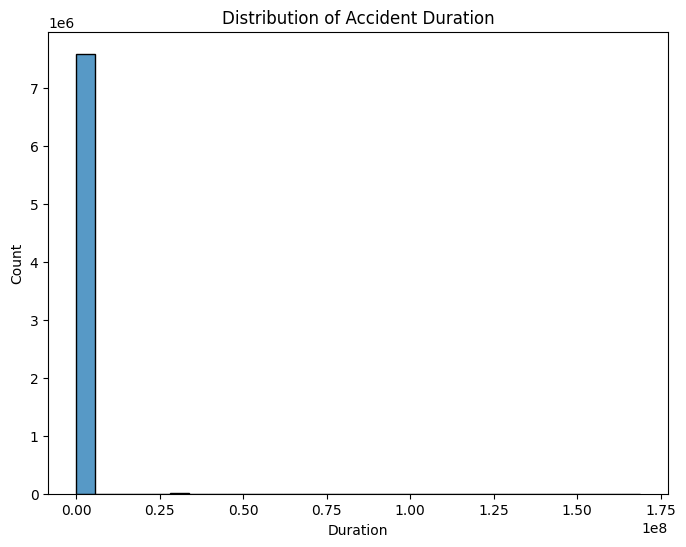

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df_drop['Duration'], bins=30)
plt.title('Distribution of Accident Duration')
plt.show()

Distribution of Visibility

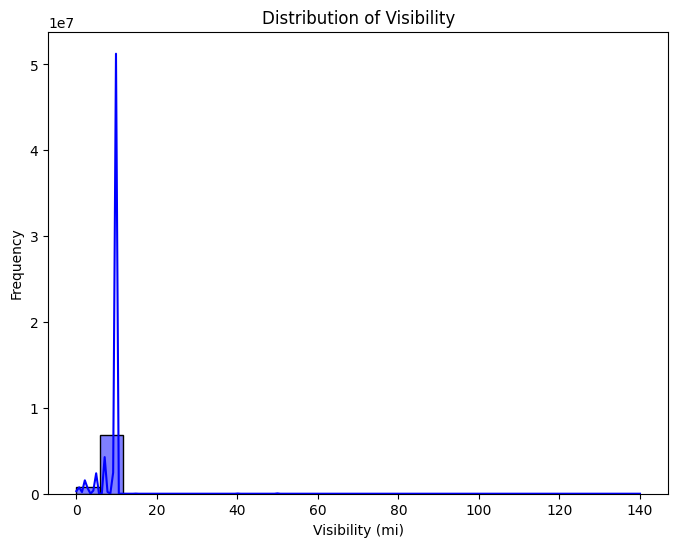

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df_drop['Visibility(mi)'], kde=True, color='blue')
plt.title('Distribution of Visibility')
plt.xlabel('Visibility (mi)')
plt.ylabel('Frequency')
plt.show()

Impact of Visibility on Severity

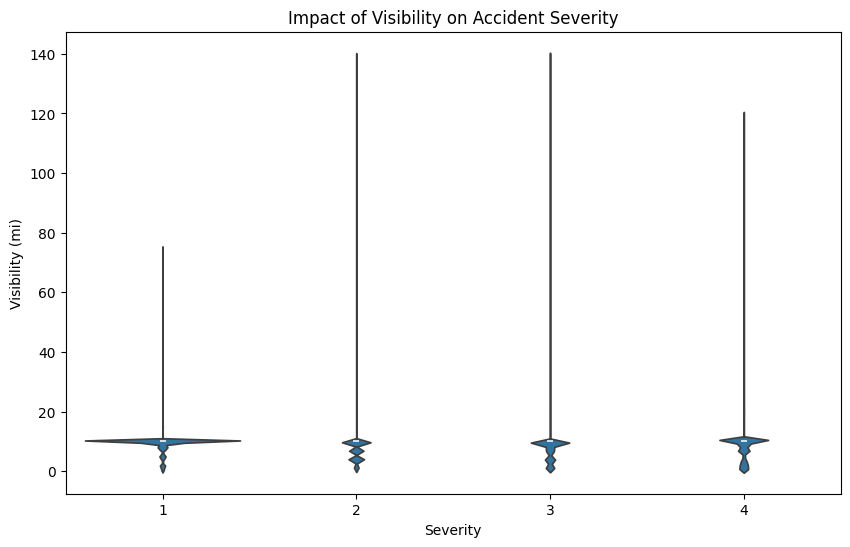

In [ ]:
plt.figure(figsize=(10,6))

# Violin plot showing the density distribution of Visibility for each Severity level
sns.violinplot(x='Severity', y='Visibility(mi)', data=df_drop)
plt.title('Impact of Visibility on Accident Severity')
plt.ylabel('Visibility (mi)')
plt.xlabel('Severity')
plt.show()

Pair plot for select numerical features

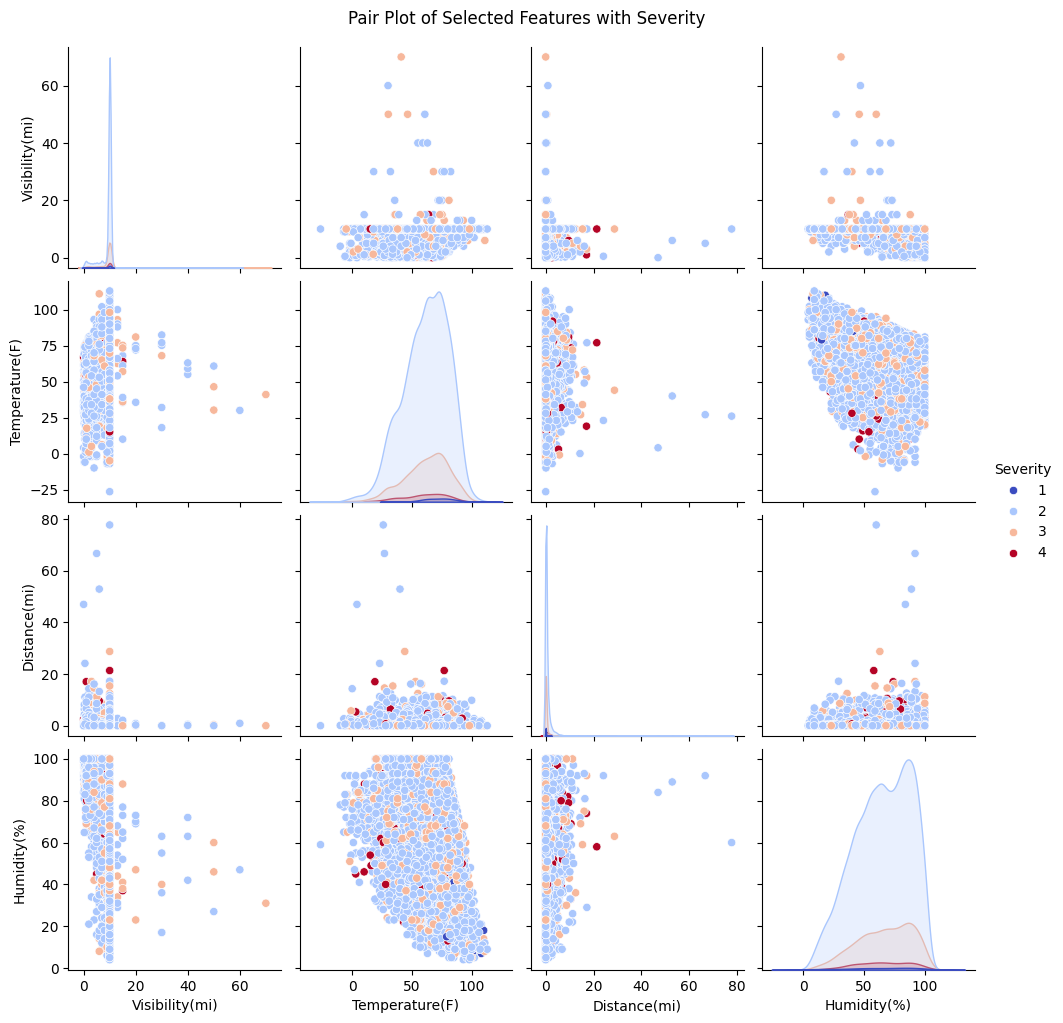

In [ ]:
df_sample = df_drop.sample(10000, random_state=42)

# Numerical features for pairplot
pairplot_features = ['Severity', 'Visibility(mi)', 'Temperature(F)', 'Distance(mi)', 'Humidity(%)']

# Severity as the hue to differentiate the severity levels
sns.pairplot(df_sample[pairplot_features], hue='Severity', palette='coolwarm')

plt.suptitle('Pair Plot of Selected Features with Severity', y=1.02)
plt.show()

Scatter Plot: Distance vs Severity

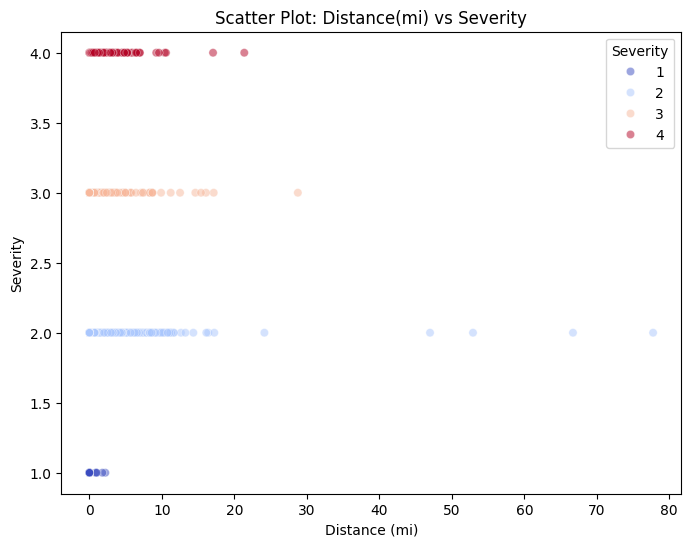

In [ ]:
plt.figure(figsize=(8,6))

# Scatter Plot
sns.scatterplot(x='Distance(mi)', y='Severity', data=df_sample, hue='Severity', palette='coolwarm', alpha=0.5)
plt.title('Scatter Plot: Distance(mi) vs Severity')
plt.xlabel('Distance (mi)')
plt.ylabel('Severity')
plt.show()